In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Let's try on another DataSet
heart_diseases=pd.read_csv("heart-disease.csv")
heart_diseases.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


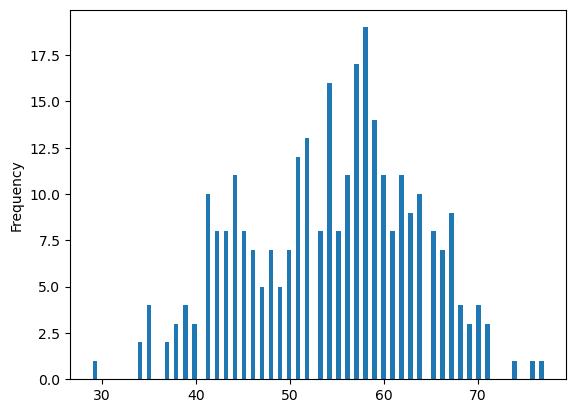

In [9]:
heart_diseases["age"].plot.hist(bins=100);      # bydefault bins=10

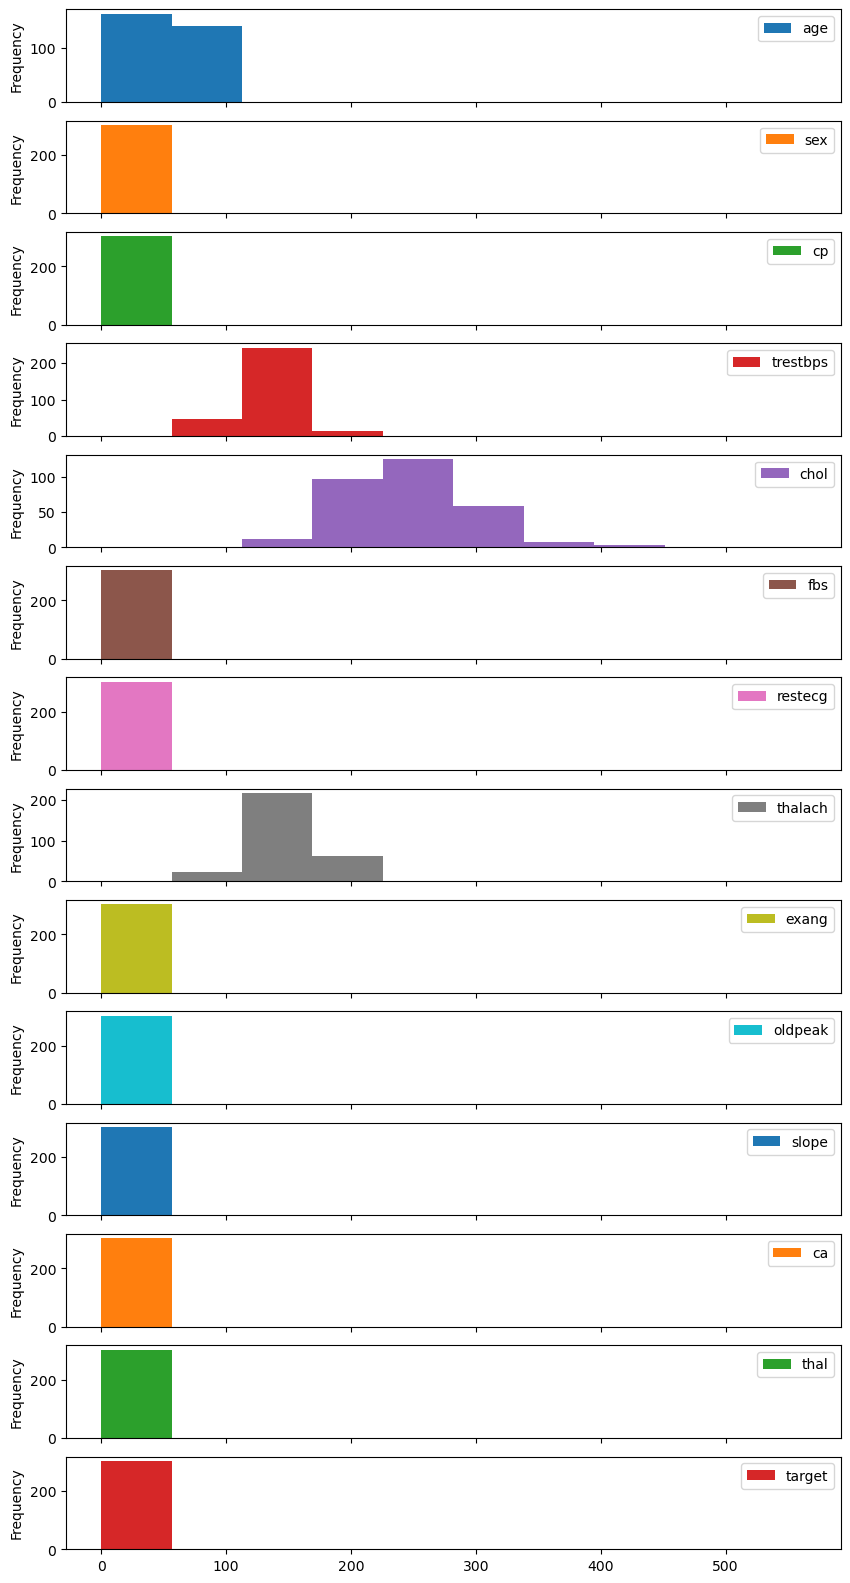

In [15]:
# to plot a histogram on subplots from a pandas DataFrame
heart_diseases.plot.hist(figsize=(10,20),subplots=True);     # figsize-to stretch it out

## Which one should we use?
* When plotting something quickly, okay to use pyplot method
* When plotting something more advanced, use the OO method

In [17]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
over_age_40=heart_disease[heart_disease["age"]>40]
len(over_age_40)

284

In [20]:
over_age_40.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


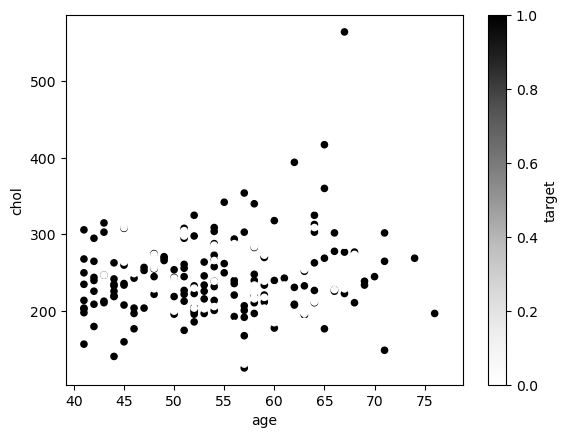

In [24]:
# pyplot - plotting directly from the pandas DataFrame
over_age_40.plot(kind="scatter", x="age", y="chol", c="target");        
# c-color to target

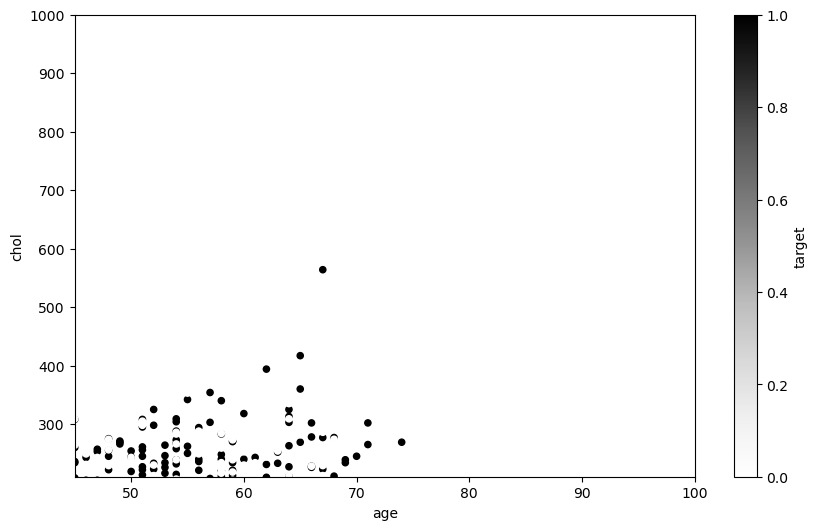

In [33]:
# OO method mixed with pyplot method
fig, ax=plt.subplots(figsize=(10,6))
over_age_40.plot(kind="scatter", x="age", y="chol", c="target", ax=ax); 
# to adjust the limitation on x, y-axis
ax.set_xlim([45,100]);
ax.set_ylim([210,1000]);

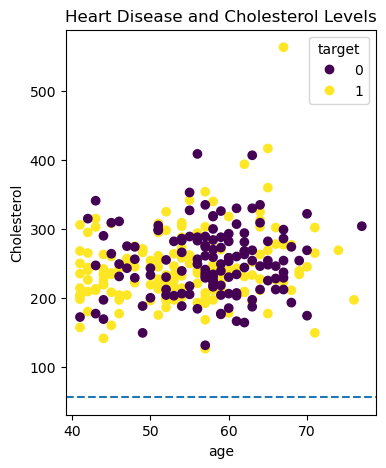

In [45]:
## OO  method from scratch
fig, ax=plt.subplots(figsize=(4,5))
k=ax.scatter(x=over_age_40["age"],
           y=over_age_40["chol"],
           c=over_age_40["target"]);
ax.set(title="Heart Disease and Cholesterol Levels",
      xlabel="age",
      ylabel="Cholesterol");
# legend- explanation of the colors, symbols
ax.legend(*k.legend_elements(), title="target");
# Add a horizontal line
ax.axhline(over_age_40["age"].mean(),
         linestyle="--");

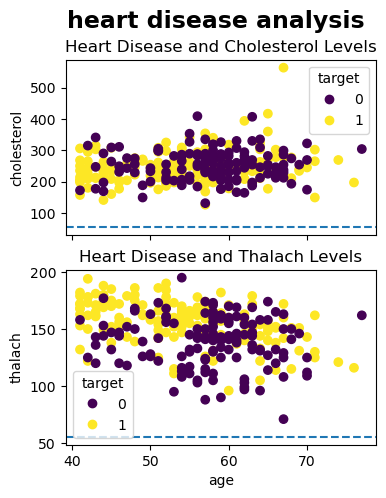

In [67]:
# Subplot of chol, age, thalach
fig, (ax1, ax2)= plt.subplots(nrows=2, ncols=1, figsize=(4,5), sharex=True);

# Add data to ax0
k=ax1.scatter(x=over_age_40["age"],
           y=over_age_40["chol"],
           c=over_age_40["target"]);

# Customize ax1
ax1.set(title="Heart Disease and Cholesterol Levels",
       ylabel="cholesterol");

# Add a legend to ax1
ax1.legend(*k.legend_elements(), title="target");

# Add a meanline
ax1.axhline(over_age_40["age"].mean(), linestyle="--");

# for ax2
j=ax2.scatter(x=over_age_40["age"],
             y=over_age_40["thalach"],
             c=over_age_40["target"]);
ax2.set(title="Heart Disease and Thalach Levels",
        xlabel="age",
       ylabel="thalach");
ax2.legend(*j.legend_elements(), title="target");
ax2.axhline(over_age_40["age"].mean(), linestyle="--");

# Add a title to the figure
fig.suptitle("heart disease analysis", fontsize=17, fontweight="bold");